iteration 0: loss 0.464372
iteration 100: loss 0.874342
iteration 200: loss 0.878725
iteration 300: loss 0.866433
iteration 400: loss 0.860947
iteration 500: loss 0.858351
iteration 600: loss 0.857507
iteration 700: loss 0.857448
iteration 800: loss 0.857943
iteration 900: loss 0.858913
iteration 1000: loss 0.860392
iteration 1100: loss 0.862482
iteration 1200: loss 0.865214
iteration 1300: loss 0.868701
iteration 1400: loss 0.873081
iteration 1500: loss 0.878557
iteration 1600: loss 0.885349
iteration 1700: loss 0.893716
iteration 1800: loss 0.903805
iteration 1900: loss 0.915977
iteration 2000: loss 0.930678
iteration 2100: loss 0.948622
iteration 2200: loss 0.970284
iteration 2300: loss 0.995307
iteration 2400: loss 1.024416
iteration 2500: loss 1.056953
iteration 2600: loss 1.093804
iteration 2700: loss 1.134287
iteration 2800: loss 1.178895
iteration 2900: loss 1.226816
iteration 3000: loss 1.278182
iteration 3100: loss 1.332240
iteration 3200: loss 1.388007
iteration 3300: loss 1

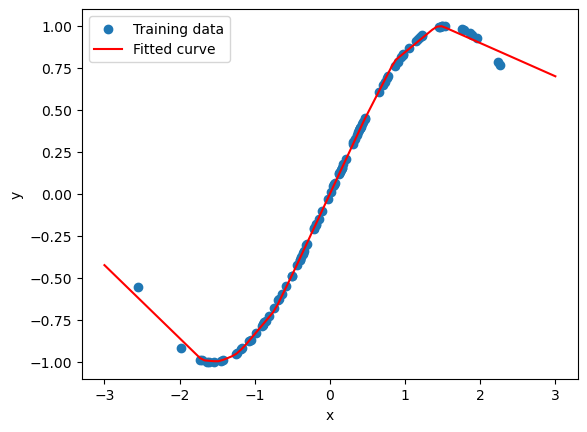

In [9]:
import numpy as np

class ReLU:
    def forward(self, x):
        # ReLU函数前向传播
        self.mem = x
        return np.maximum(0, x)

    def backward(self, grad_y):
        x = self.mem
        grad_x = grad_y * (x > 0)
        return grad_x

class Net:
    def __init__(self, input_size, hidden_size, output_size):
        # 初始化权重和偏置
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) * 0.01
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size) * 0.01
        self.params['b2'] = np.zeros(output_size)
        # 实例化ReLU层
        self.relu = ReLU()

    def forward(self, x):
        # 第一层前向传播
        h1 = np.dot(x, self.params['W1']) + self.params['b1']
        h1_relu = self.relu.forward(h1)
        # 第二层前向传播
        scores = np.dot(h1_relu, self.params['W2']) + self.params['b2']
        return scores

    def backward(self, x, y, learning_rate=0.05, num_iters=10000):
        for i in range(num_iters):
            # 前向传播
            scores = self.forward(x)
            # 计算损失
            data_loss = np.mean((scores - y) ** 2)
            reg_loss = 0.5 * np.sum(self.params['W1'] ** 2) + 0.5 * np.sum(self.params['W2'] ** 2)
            loss = data_loss + reg_loss
            if i % 100 == 0:
                print("iteration %d: loss %f" % (i, loss))
            # 反向传播
            dscores = 2.0 * (scores - y) / x.shape[0]
            grads = {}
            grads['W2'] = np.dot(self.relu.forward(np.dot(x, self.params['W1']) + self.params['b1']).T, dscores)
            grads['b2'] = np.sum(dscores, axis=0)
            dh1_relu = np.dot(dscores, self.params['W2'].T)
            dh1 = self.relu.backward(dh1_relu)
            grads['W1'] = np.dot(x.T, dh1)
            grads['b1'] = np.sum(dh1, axis=0)
            # 更新参数
            self.params['W1'] -= learning_rate * grads['W1']
            self.params['b1'] -= learning_rate * grads['b1']
            self.params['W2'] -= learning_rate * grads['W2']
            self.params['b2'] -= learning_rate * grads['b2']

# 拟合sinx
np.random.seed(0)
x_train = np.random.randn(100, 1)
y_train = np.sin(x_train)  # 添加噪声

# 创建并训练神经网络
input_size = 1
hidden_size = 200
output_size = 1
model = Net(input_size, hidden_size, output_size)
model.backward(x_train, y_train)

# 绘制拟合曲线
import matplotlib.pyplot as plt
x_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.forward(x_test)
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_test, y_pred, color='red', label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
